# Predictive Analysis 

In [3]:
# Imoprt libs
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc

In [4]:
# Read database 1 
df = pd.read_csv("https://raw.githubusercontent.com/r41ss4/rennes_ba/refs/heads/main/data/merged/merged_data.csv")

# Regression Techniques

## Data Splitting and Preparation

### Random Forest and Multiple Linear Regression

In [8]:
# Define features and rating as the target variable
Xr = df.drop(columns=['rating'])  
yr = df['rating']

In [9]:
# Split the data into training and testing sets
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, test_size=0.2, random_state=42)

### Logistic Regression

In [11]:
# Identify categorical columns
cat_cols = Xr.select_dtypes(include=['object']).columns

In [12]:
# Preprocessing for numerical data
num_transformer = SimpleImputer(strategy='mean')

In [13]:
# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, Xr.select_dtypes(exclude=['object']).columns),
        ('cat', cat_transformer, cat_cols)
    ])

In [15]:
# Convert continuous target variable to discrete classes for Logistic Regression
# Example: Convert ratings to binary classes (0 and 1)
thresholdlog = yr.median()
y_classlog = (yr >= thresholdlog).astype(int)

In [16]:
# Identify categorical columns
logcat_cols = Xr.select_dtypes(include=['object']).columns

In [17]:
# Preprocessing for numerical data
lognum_transformer = SimpleImputer(strategy='mean')

In [18]:
# Preprocessing for categorical data
logcat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Bundle preprocessing for numerical and categorical data
logpreprocessor = ColumnTransformer(
    transformers=[
        ('num', lognum_transformer, Xr.select_dtypes(exclude=['object']).columns),
        ('cat', logcat_transformer, logcat_cols)
    ])

In [20]:
# Split the data into training and testing sets for Logistic Regression
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(Xr, y_classlog, test_size=0.2, random_state=42)

### Simple Linear Regression 

In [22]:
# Filter out rows where 'type' is 'Unknown'
df2 = df[df['type'] != 'Unknown']

In [23]:
# Convert numeric data into numeric data that will be able to handle it
# In our dataset Show(1) and Series(2) 
df2.type[df2.type == 'Show'] = 1
df2.type[df2.type == 'Movie'] = 2
df2.head()

/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_68875/2559107026.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2.type[df2.type == 'Show'] = 1
/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_68875/2559107026.py:3

,title,year,certificate,duration_min,genre,rating,description,stars,votes,type,warnings,language,production_countries,seasons
0,Breaking Bad,2008,TV-MA,48.0,"Drama, Comedy, Crime, Thriller",9.2,"When walter white, a new mexico chemistry teac...",Unknown,1936461.0,1,Unknown,Unknown,US,5.0
1,Stranger Things,2016,TV-14,61.0,"Drama, Scifi, Thriller, Fantasy, Horror",8.6,"When a young boy vanishes, a small town uncove...",Unknown,1220079.0,1,Unknown,Unknown,US,5.0
2,The Walking Dead,2010,TV-MA,46.0,"Action, Drama, Horror, Thriller",8.1,Sheriff's deputy rick grimes awakens from a co...,Unknown,1013253.0,1,Unknown,Unknown,US,11.0
3,Peaky Blinders,2013,TV-MA,58.0,"Drama, Crime, European",8.7,"A gangster family epic set in 1919 birmingham,...",Unknown,567949.0,1,Unknown,Unknown,GB,6.0
4,Black Mirror,2011,TV-MA,59.0,"Scifi, Drama, Thriller, European",8.6,A contemporary british re-working of the twili...,Unknown,560631.0,1,Unknown,Unknown,GB,5.0


In [24]:
# Define features and rating as the target variable
Xlr = df2[['type']] 
ylr = df2['rating'] 

In [25]:
# Split the data into training and testing sets in simple regression
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(Xlr, ylr, test_size=0.2, random_state=42)

## Model Training

### Random Forest 

In [28]:
# Define the model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [29]:
# Train the random forest model
rf_model.fit(X_trainr, y_trainr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'type',
       'warnings', 'language', 'production_countries'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

### Linear Regression

In [31]:
# Define the model for Linear Regression
lr_model = Pipeline(steps=[
    ('model', LinearRegression())
])

In [32]:
# Train the linear regression model
lr_model.fit(X_trainlr, y_trainlr)

Pipeline(steps=[('model', LinearRegression())])

### Multiple Linear Regression

In [34]:
# Multiple Linear Regression
mlr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [35]:
# Train the Linear Regression model
mlr_model.fit(X_trainr, y_trainr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'type',
       'warnings', 'language', 'production_countries'],
      dtype='object'))])),
                ('model', LinearRegression())])

### Logistic Regression

In [37]:
# Logistic Regression
logreg_model = Pipeline(steps=[
    ('preprocessor', logpreprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [38]:
# Train the Linear Regression model
logreg_model.fit(X_train_logreg, y_train_logreg)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'type',
       'warnings', 'language', 'production_countries'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

## Models evaluation and predictions

### Random Forest evaluation and predictions

In [41]:
# Make predictions
rf_predictions = rf_model.predict(X_testr)

In [42]:
# Evaluate the model
rf_mse = mean_squared_error(y_testr, rf_predictions)
rf_r2 = r2_score(y_testr, rf_predictions)

In [43]:
# Review results
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R2: {rf_r2}')

Random Forest MSE: 0.7850626799772636
Random Forest R2: 0.34053567015693964


### Lineal Regression evaluation and predictions

In [45]:
# Make predictions
lr_predictions = lr_model.predict(X_testlr)

In [46]:
# Evaluate the model
lr_mse = mean_squared_error(y_testlr, lr_predictions)
lr_r2 = r2_score(y_testlr, lr_predictions)

In [47]:
# Review results
print(f'Linear Regression MSE: {lr_mse}')
print(f'Linear Regression R2: {lr_r2}')

Linear Regression MSE: 1.0458646958997917
Linear Regression R2: 0.09105017209276489


### Multiple Linear Regression evaluation and prediction

In [49]:
# Make predictions
mlr_predictions = mlr_model.predict(X_testr)

In [50]:
# Evaluate the model
mlr_mse = mean_squared_error(y_testr, mlr_predictions)
mlr_r2 = r2_score(y_testr, mlr_predictions)

In [51]:
# Review results
print(f'Multiple Linear Regression MSE: {mlr_mse}')
print(f'Multiple Linear Regression R2: {mlr_r2}')

Multiple Linear Regression MSE: 0.9849596722169145
Multiple Linear Regression R2: 0.17261922299022103


### Logistic Regression evaluation and prediction

In [53]:
# Make predictions for Logistic Regression
logreg_predictions = logreg_model.predict(X_test_logreg)

In [54]:
# Evaluate the model
logreg_mse = mean_squared_error(y_test_logreg, logreg_predictions)
logreg_r2 = r2_score(y_test_logreg, logreg_predictions)

In [55]:
# Review results
print(f'Logistic Regression MSE: {logreg_mse}')
print(f'Logistic Regression R2: {logreg_r2}')

Logistic Regression MSE: 0.2979405034324943
Logistic Regression R2: -0.19236166296158475


## Interpretation and Visualization

### Random Forest visualization

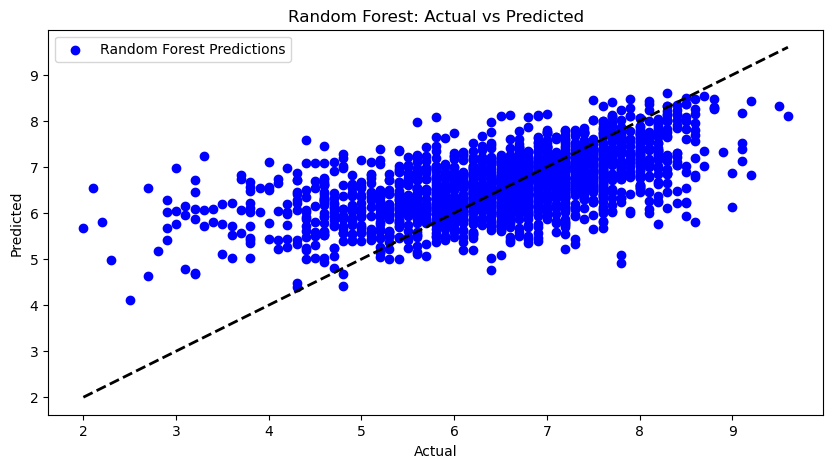

In [58]:
# Plotting Random Forest predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_testr, rf_predictions, color='blue', label='Random Forest Predictions')
plt.plot([y_testr.min(), y_testr.max()], [y_testr.min(), y_testr.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()

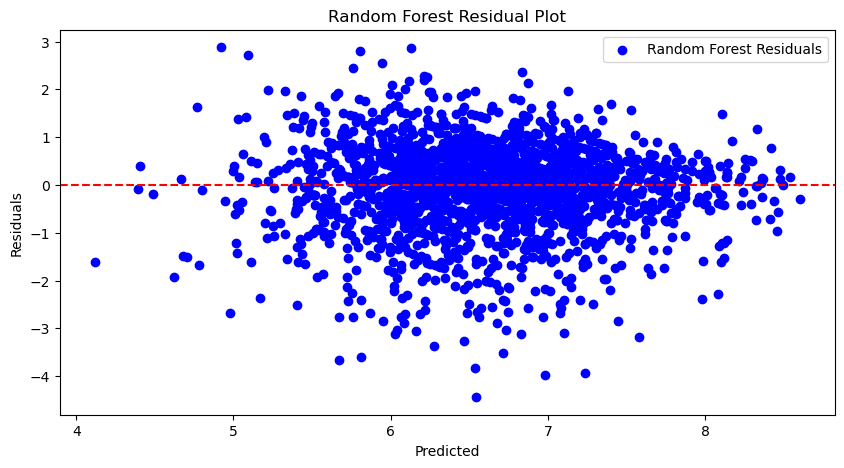

In [59]:
# Residual plot for Linear Regression
rf_residuals = y_testr - rf_predictions
plt.figure(figsize=(10, 5))
plt.scatter(rf_predictions, rf_residuals, color='blue', label='Random Forest Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Random Forest Residual Plot')
plt.legend()
plt.show()

### Multiple Lineal Regression visualization

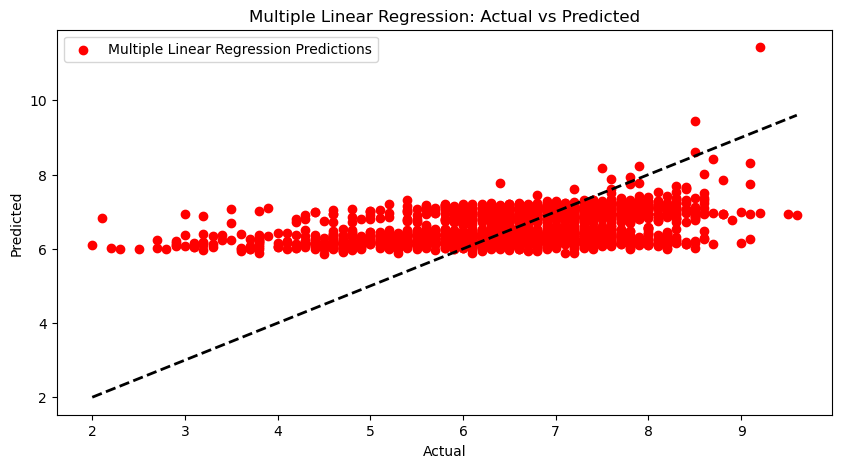

In [61]:
# Plotting Linear Regression predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_testr, mlr_predictions, color='red', label='Multiple Linear Regression Predictions')
plt.plot([y_testr.min(), y_testr.max()], [y_testr.min(), y_testr.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

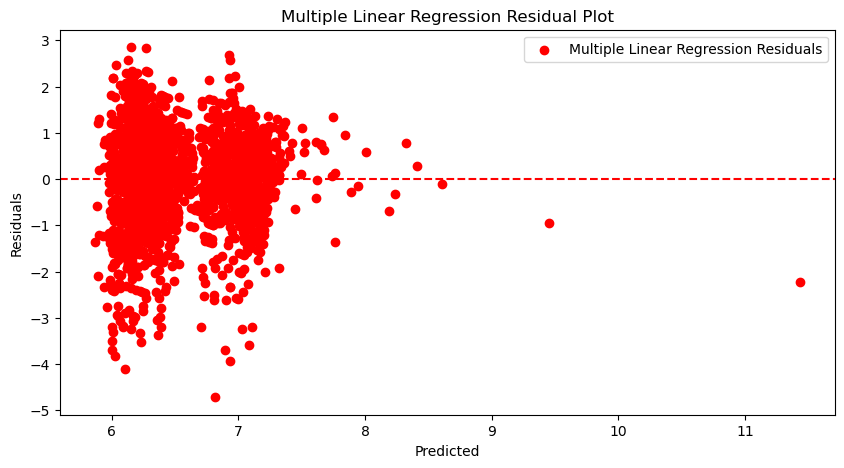

In [62]:
# Residual plot for Linear Regression
mlr_residuals = y_testr - mlr_predictions
plt.figure(figsize=(10, 5))
plt.scatter(mlr_predictions, mlr_residuals, color='red', label='Multiple Linear Regression Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Multiple Linear Regression Residual Plot')
plt.legend()
plt.show()

### Linear Linear Regression visualization

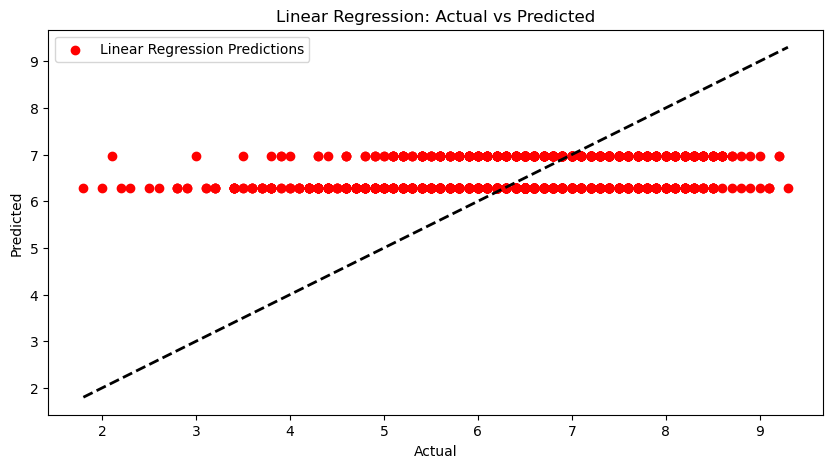

In [64]:
# Plotting Linear Regression predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_testlr, lr_predictions, color='red', label='Linear Regression Predictions')
plt.plot([y_testlr.min(), y_testlr.max()], [y_testlr.min(), y_testlr.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

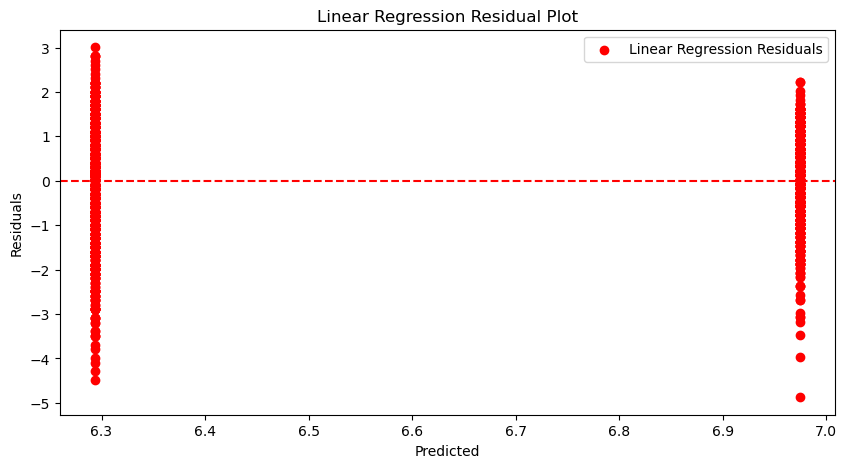

In [65]:
# Residual plot for Linear Regression
lr_residuals = y_testlr - lr_predictions
plt.figure(figsize=(10, 5))
plt.scatter(lr_predictions, lr_residuals, color='red', label='Linear Regression Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Linear Regression Residual Plot')
plt.legend()
plt.show()

### Logistic Regression visualization

In [67]:
# Evaluate the Logistic Regression model using confusion matrix and classification report
logreg_cm = confusion_matrix(y_test_logreg, logreg_predictions)
print("Logistic Regression Confusion Matrix:")
print(logreg_cm)

Logistic Regression Confusion Matrix:
[[816 252]
 [399 718]]


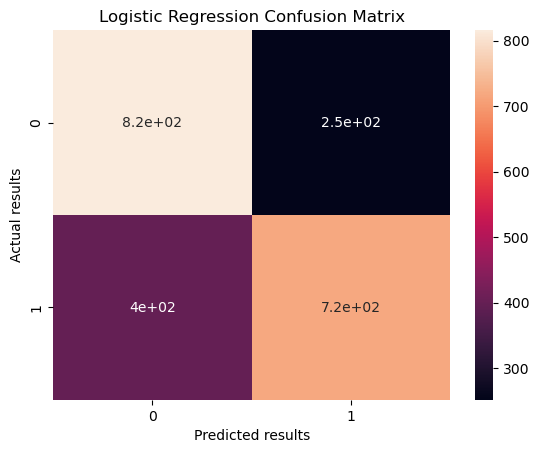

In [68]:
# Create the heatmap with annotations
sn.heatmap(logreg_cm, annot=True)

# Add title and axis names
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted results')
plt.ylabel('Actual results')

# Display the heatmap
plt.show()

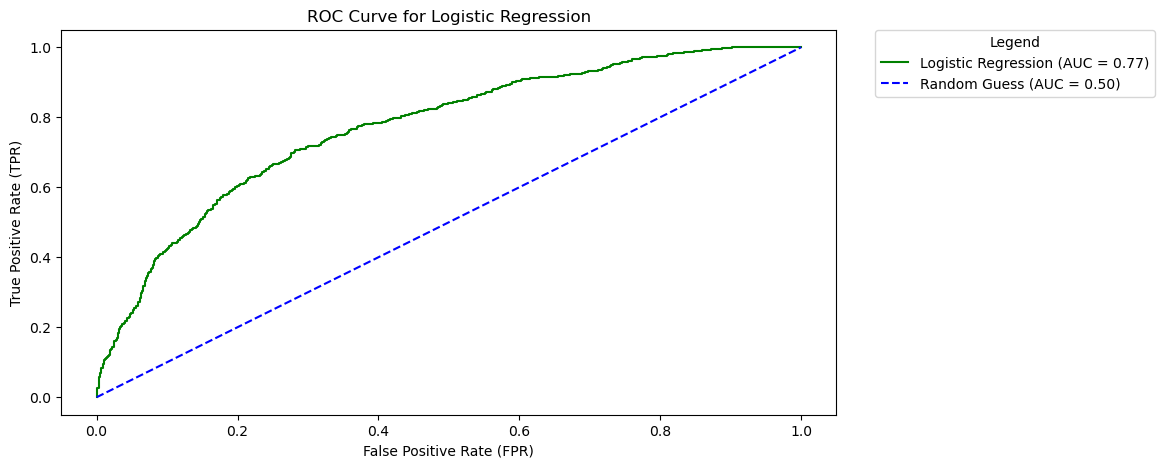

In [69]:
# ROC curve for Logistic Regression
lr_probs = logreg_model.predict_proba(X_test_logreg)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test_logreg, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

plt.figure(figsize=(10, 5))
plt.plot(lr_fpr, lr_tpr, color='green', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(title='Legend', loc='lower right')
# Move the legend outside the graphic and position it in the upper right
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

# Classification Modeling & Predictive Analysis

## Data Splitting and Preparation

In [72]:
# Convert continuous target variable to discrete classes
# Example: Convert ratings to binary classes (0 and 1)
threshold = yr.median()
y_classrf = (yr >= threshold).astype(int)

In [73]:
# Define the model
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [74]:
# Define the model pipeline for Decision Tree Classifier
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

In [75]:
# Split the data into training and testing sets
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(Xr, y_classrf, test_size=0.2, random_state=42)

In [76]:
# Split the data into training and testing sets for classification
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(Xr, y_classlog, test_size=0.2, random_state=42)

In [77]:
# Preprocessing for categorical data
non_num_cols = Xr.select_dtypes(include=['object']).columns
Xrf = pd.get_dummies(Xr, columns=non_num_cols, drop_first=True)

## Train Classification Models

### Random Forest

In [80]:
# Train the model
rf_classifier.fit(X_trainrf, y_trainrf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'type',
       'warnings', 'language', 'production_countries'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [81]:
# Make predictions
catrf_predictions = rf_classifier.predict(X_testrf)

In [82]:
# Evaluate the model using confusion matrix and classification report
rf_cm = confusion_matrix(y_testrf, catrf_predictions)
print("Random Forest Confusion Matrix:")
print(rf_cm)

Random Forest Confusion Matrix:
[[836 232]
 [350 767]]


### Decision Tree

In [84]:
# Train the Decision Tree Classifier model
dt_model.fit(X_traindt, y_traindt)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['year', 'duration_min', 'votes', 'seasons'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'certificate', 'genre', 'description', 'stars', 'type',
       'warnings', 'language', 'production_countries'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [85]:
# Make predictions for Decision Tree Classifier
dt_predictions = dt_model.predict(X_testdt)

In [86]:
# Evaluate the Decision Tree Classifier model using confusion matrix and classification report
dt_cm = confusion_matrix(y_testdt, dt_predictions)
print("Decision Tree Confusion Matrix:")
print(dt_cm)

Decision Tree Confusion Matrix:
[[753 315]
 [335 782]]


## Interpretation and Visualization

### Random Forest 

In [89]:
rf_cr = classification_report(y_testrf, catrf_predictions)
print("Random Forest Classification Report:")
print(rf_cr)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1068
           1       0.77      0.69      0.72      1117

    accuracy                           0.73      2185
   macro avg       0.74      0.73      0.73      2185
weighted avg       0.74      0.73      0.73      2185



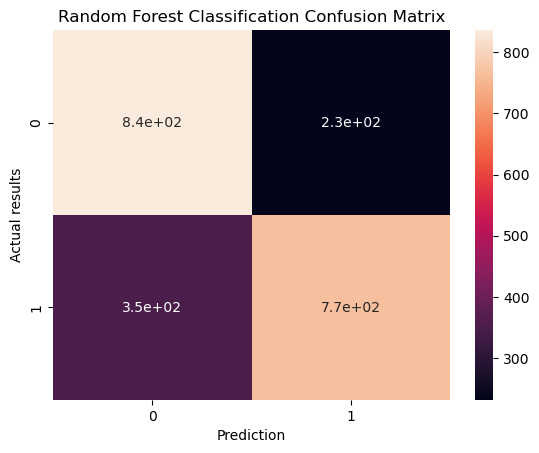

In [90]:
# Make a confusion matrix
rfcon_matrix = pd.crosstab(y_testrf, catrf_predictions, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(rfcon_matrix, annot=True)
# Add title and axis names
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual results')

# Display the heatmap
plt.show()

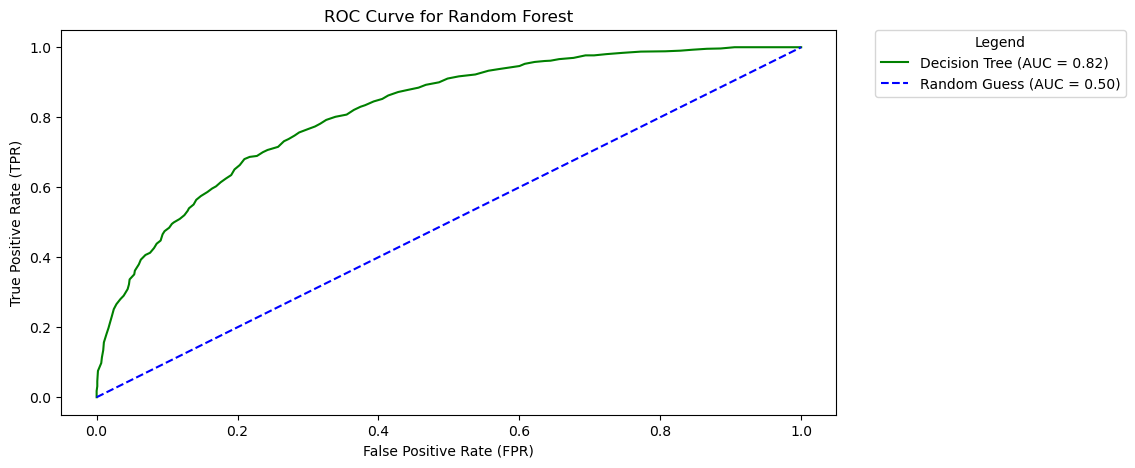

In [91]:
# ROC Curve for Decision Tree Classifier
rfc_probs = rf_classifier.predict_proba(X_testrf)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_testrf, rfc_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10, 5))
plt.plot(rf_fpr, rf_tpr, color='green', label=f'Decision Tree (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')

# Move the legend outside the graphic and up right
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

### Decision Tree

In [93]:
dt_cr = classification_report(y_testdt, dt_predictions)
print("Random Forest Classification Report:")
print(dt_cr)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1068
           1       0.71      0.70      0.71      1117

    accuracy                           0.70      2185
   macro avg       0.70      0.70      0.70      2185
weighted avg       0.70      0.70      0.70      2185



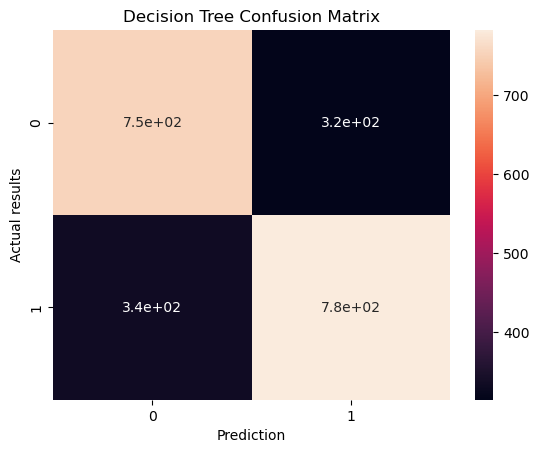

In [94]:
# Make the confusion matrix
dtcon_matrix = pd.crosstab(y_testdt, dt_predictions, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(dtcon_matrix, annot=True)
# Add title and axis names
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual results')

# Display the heatmap
plt.show()

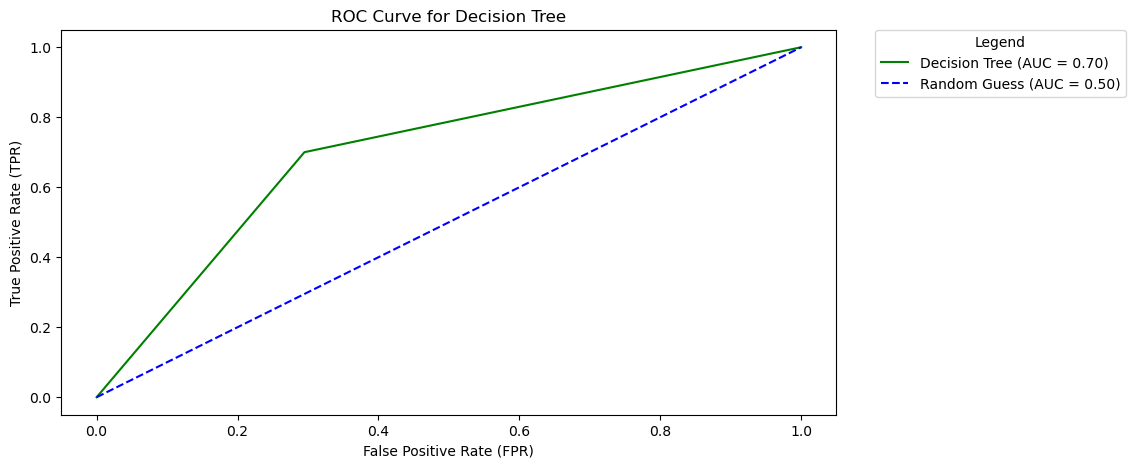

In [95]:
# ROC Curve for Decision Tree Classifier
dt_probs = dt_model.predict_proba(X_testdt)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_testdt, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

plt.figure(figsize=(10, 5))
plt.plot(dt_fpr, dt_tpr, color='green', label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree')

# Move the legend outside the graphic and up right
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()